IMPORTO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline



In [2]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv")

In [48]:
df.head()

,rating,genre,year,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_month
0,1,1,1980,927000.0,1,1,1,1,19000000,46998772,1,146,1,6
1,1,2,1980,65000.0,2,2,2,2,4500000,58853106,2,104,1,7
2,2,3,1980,1200000.0,3,3,3,2,18000000,538375067,3,124,1,6
3,2,4,1980,221000.0,4,4,4,2,3500000,83453539,4,88,1,7
4,1,4,1980,108000.0,5,5,5,2,6000000,39846344,5,98,1,7


<Axes: >

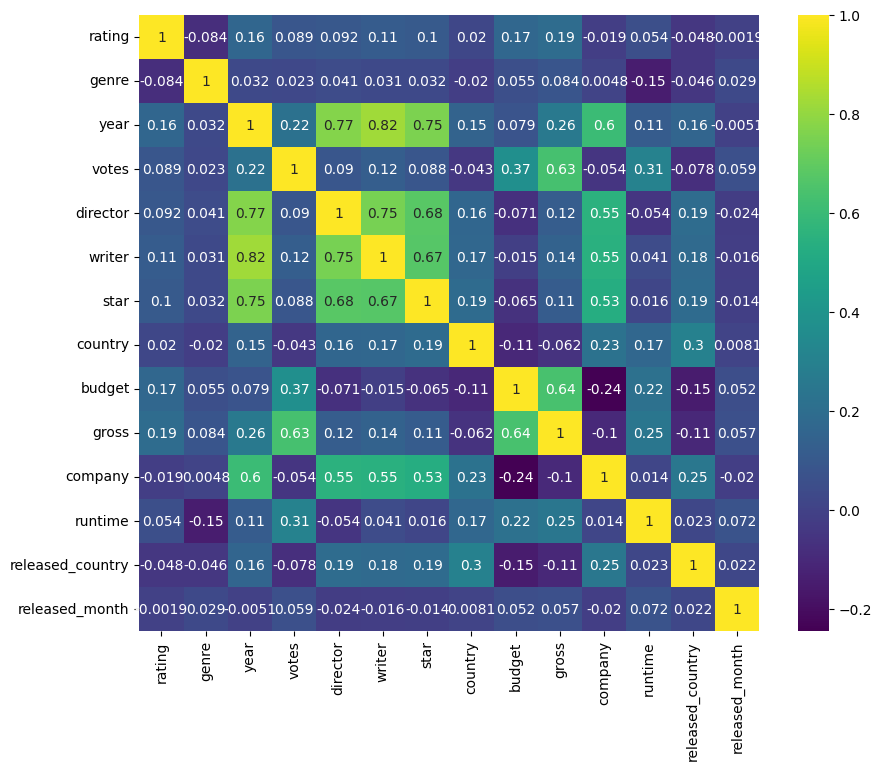

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            7413 non-null   int64  
 1   genre             7413 non-null   int64  
 2   year              7413 non-null   int64  
 3   votes             7413 non-null   float64
 4   director          7413 non-null   int64  
 5   writer            7413 non-null   int64  
 6   star              7413 non-null   int64  
 7   country           7413 non-null   int64  
 8   budget            7413 non-null   int64  
 9   gross             7413 non-null   int64  
 10  company           7413 non-null   int64  
 11  runtime           7413 non-null   int64  
 12  released_country  7413 non-null   int64  
 13  released_month    7413 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 810.9 KB


GRAFICO TODOS LOS DATOS DE MIS VARIABLES PARA VER LA DISTRIBUCION DE DATOS

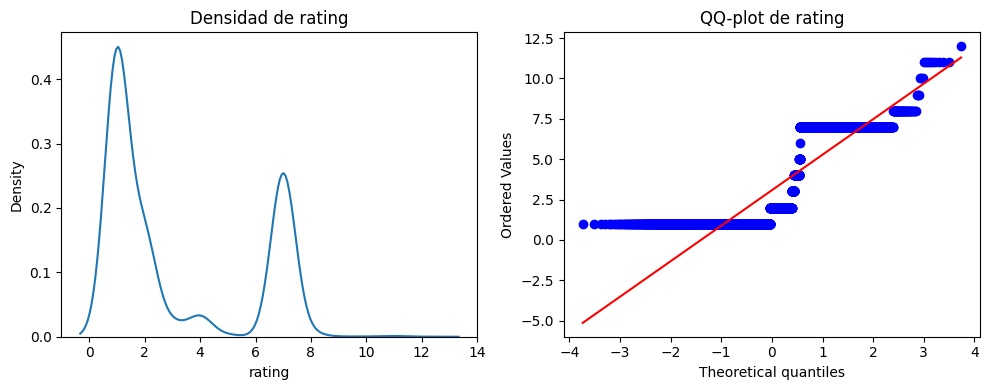

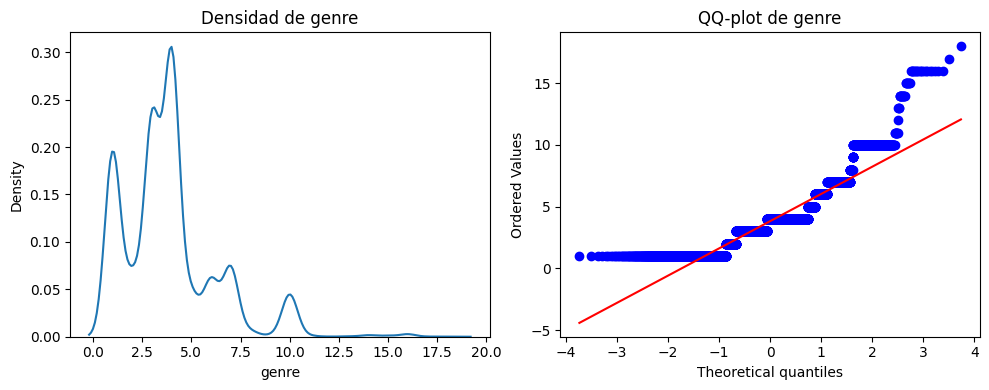

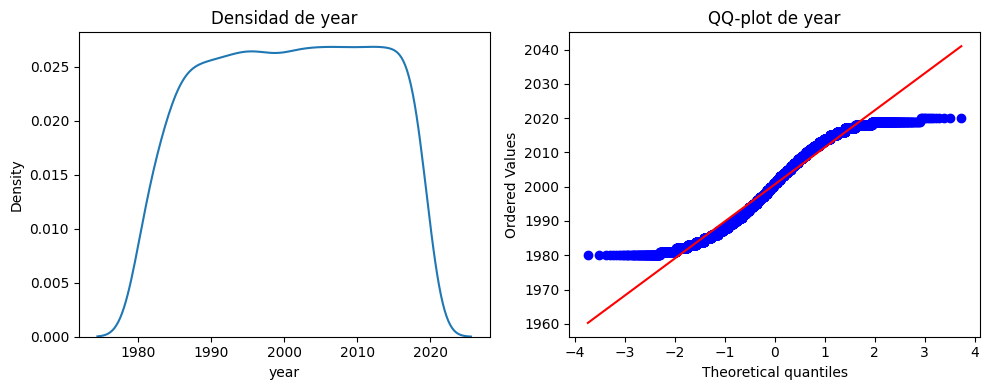

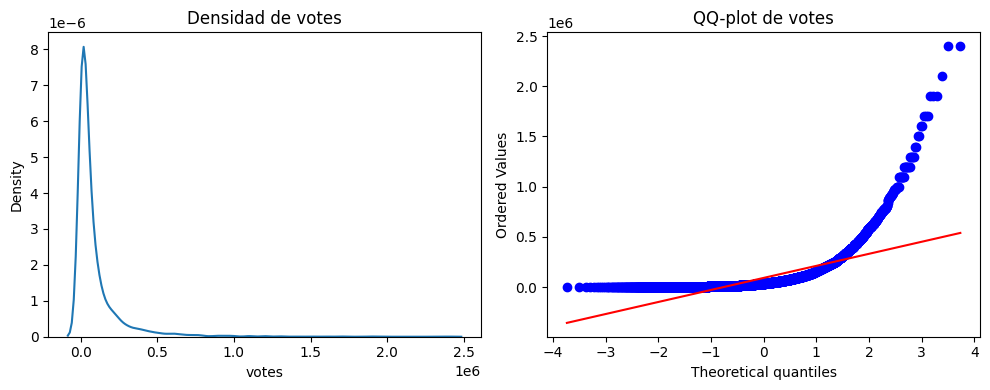

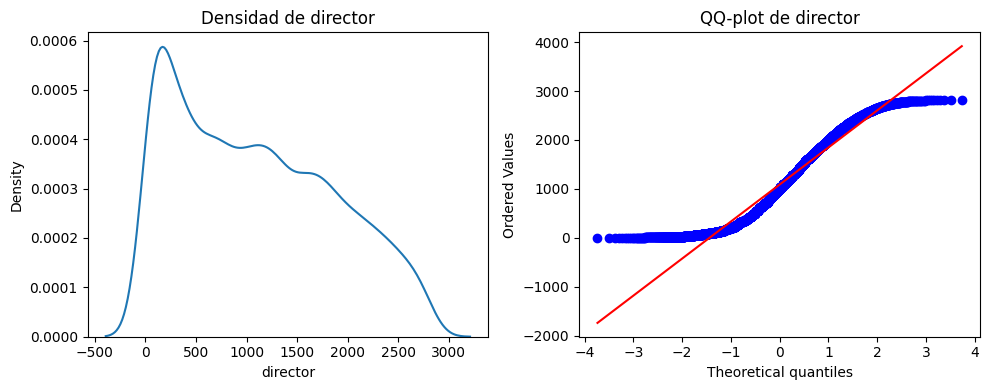

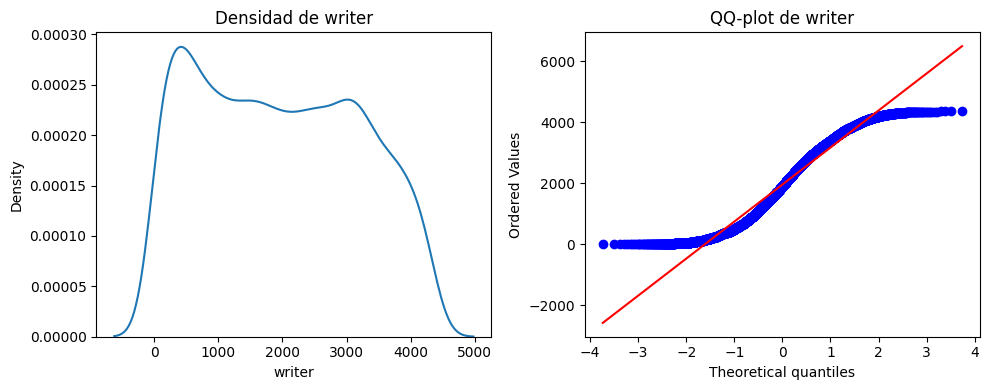

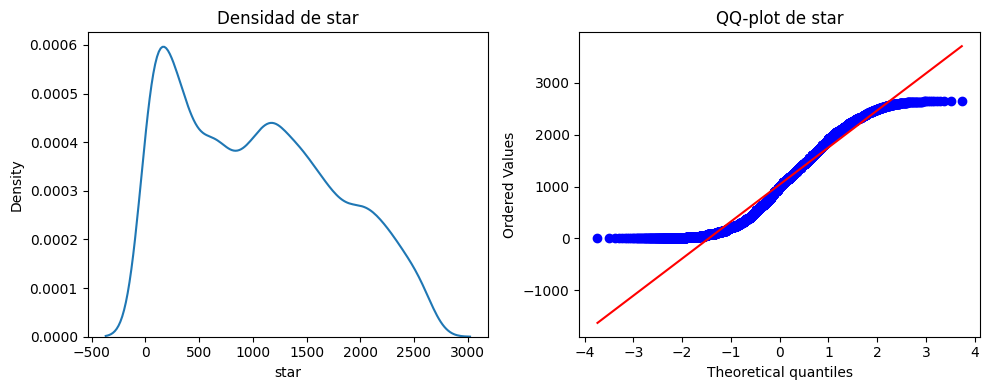

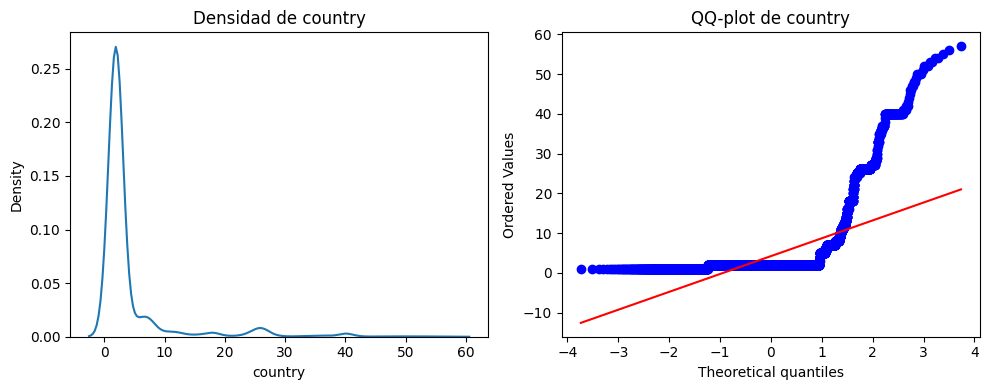

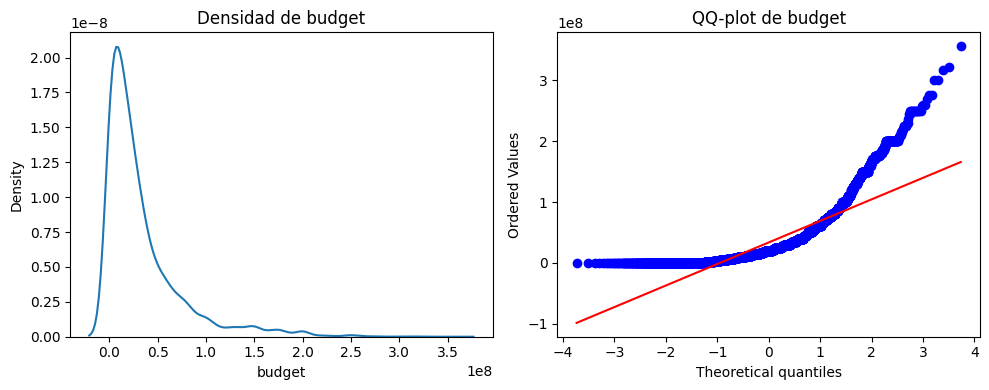

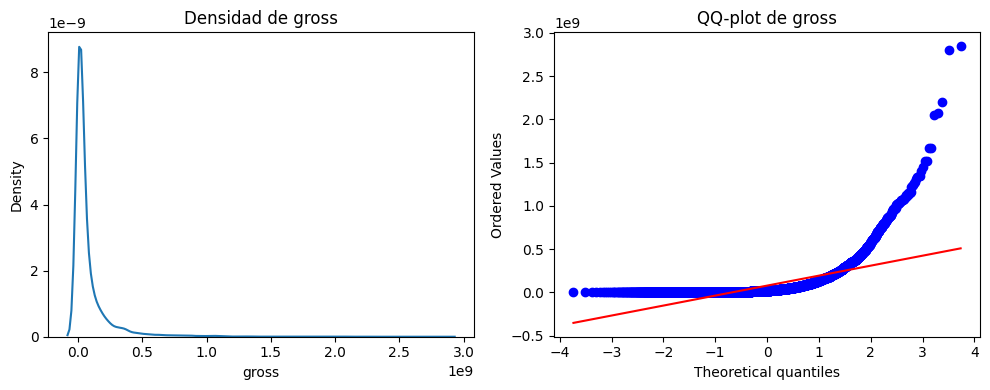

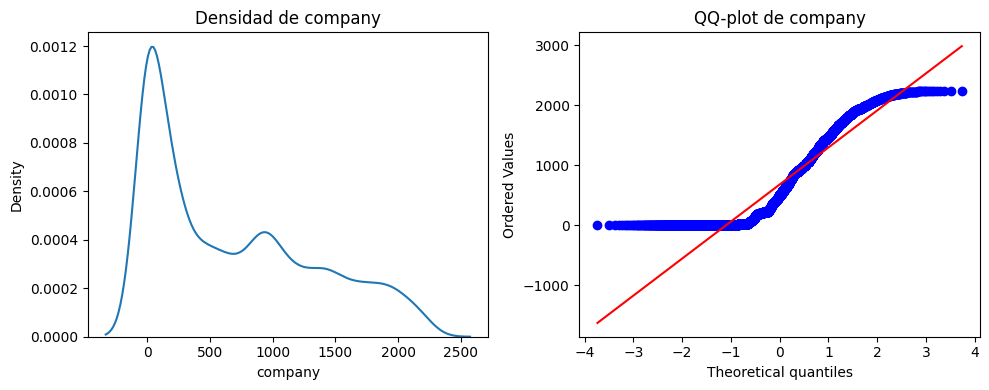

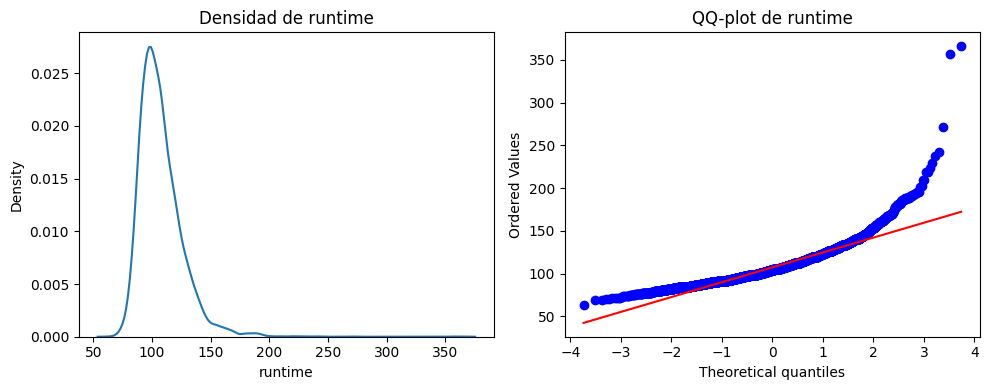

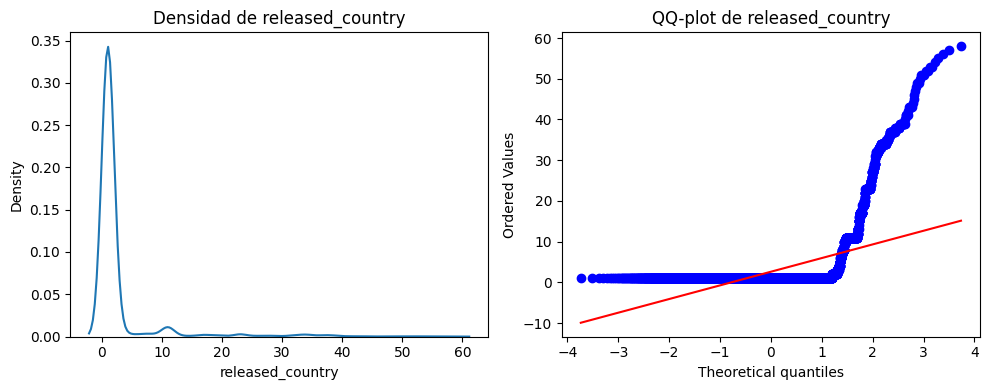

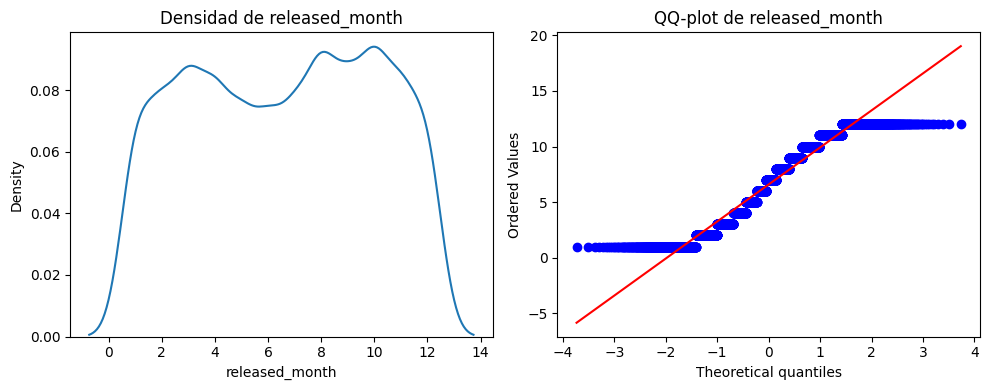

In [20]:
for col in df.columns:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    # Densidad
    sns.kdeplot(data=df[col], ax=axs[0])
    axs[0].set_title(f"Densidad de {col}")

    # QQ-plot
    stats.probplot(df[col], dist="norm", plot=axs[1])
    axs[1].set_title(f"QQ-plot de {col}")

    plt.tight_layout()
    plt.show()

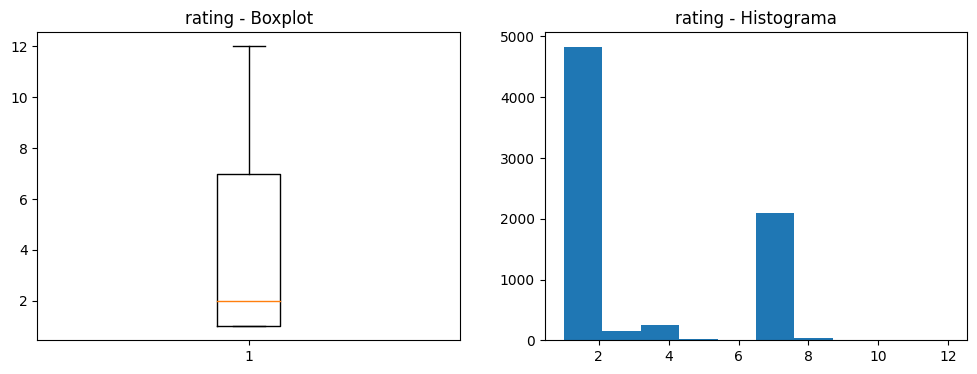

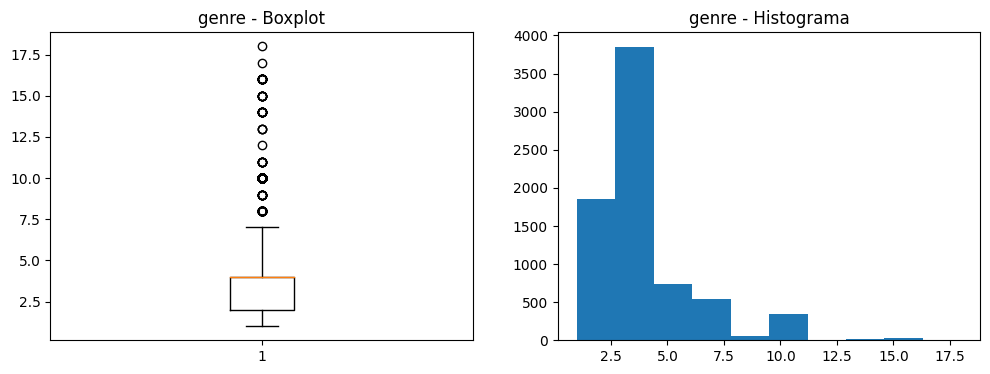

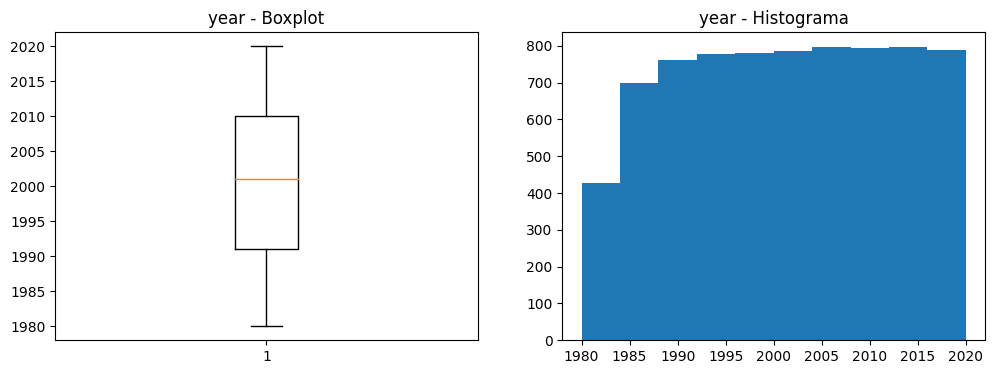

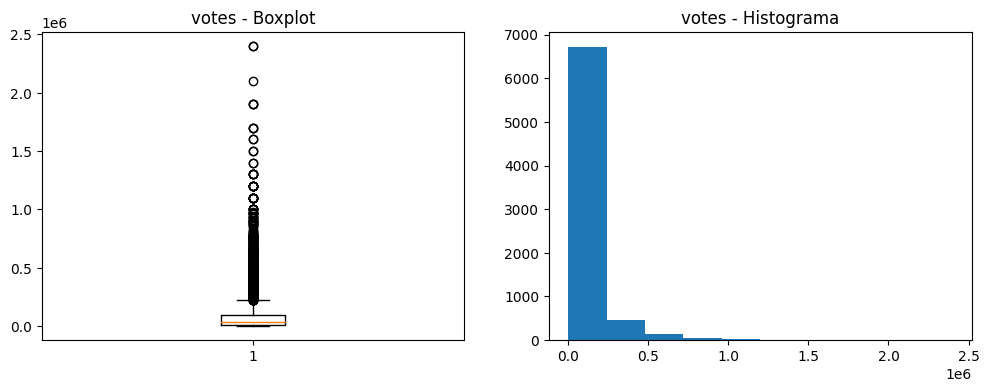

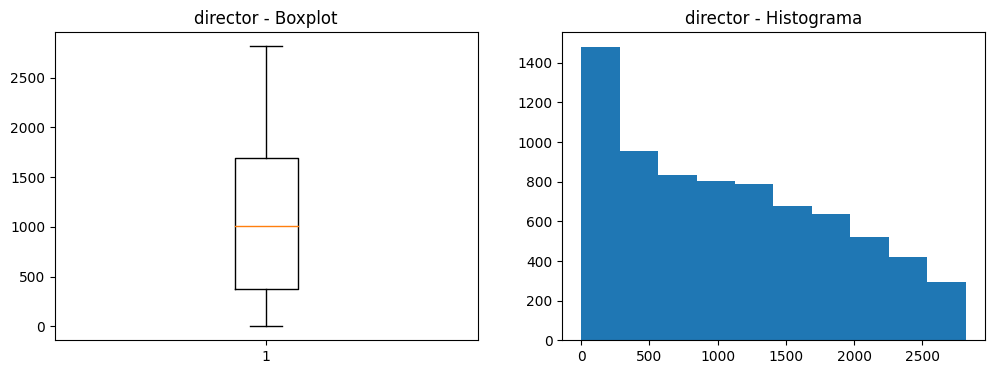

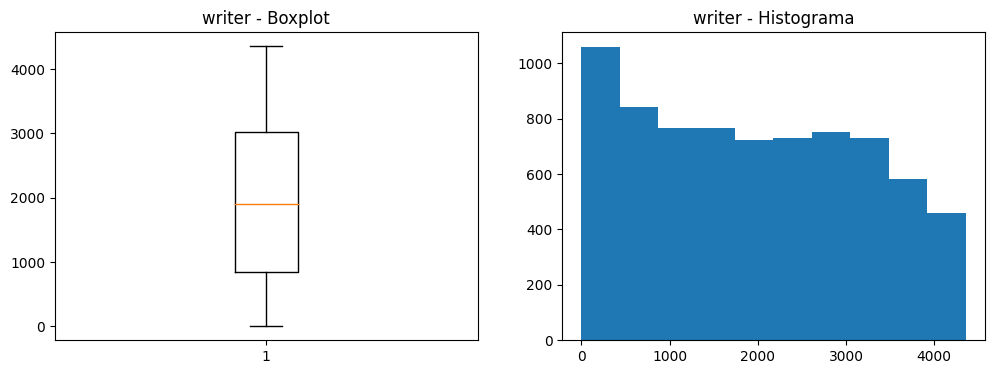

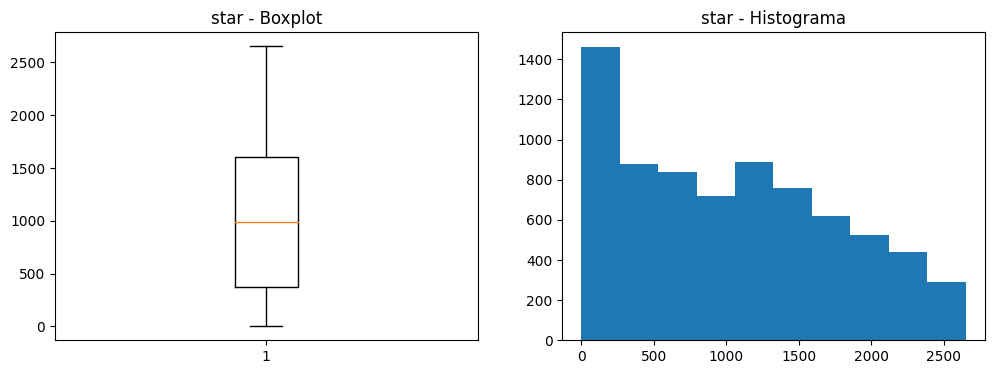

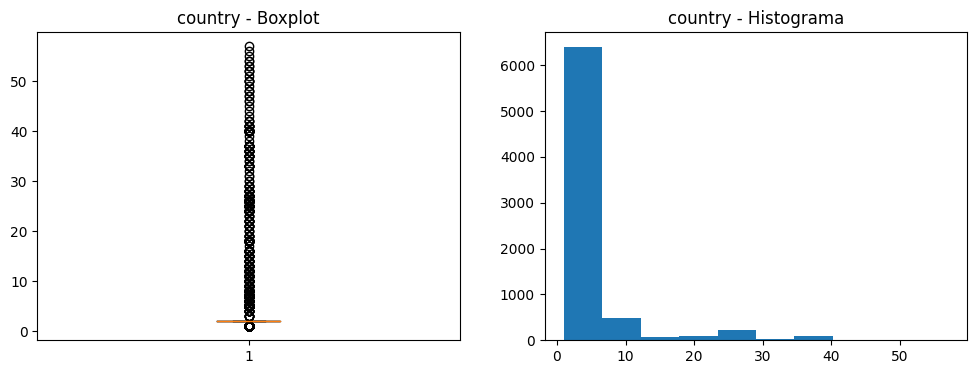

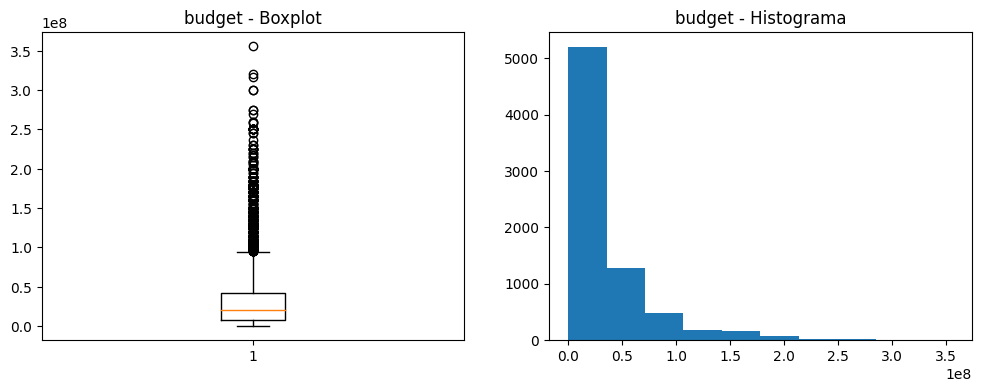

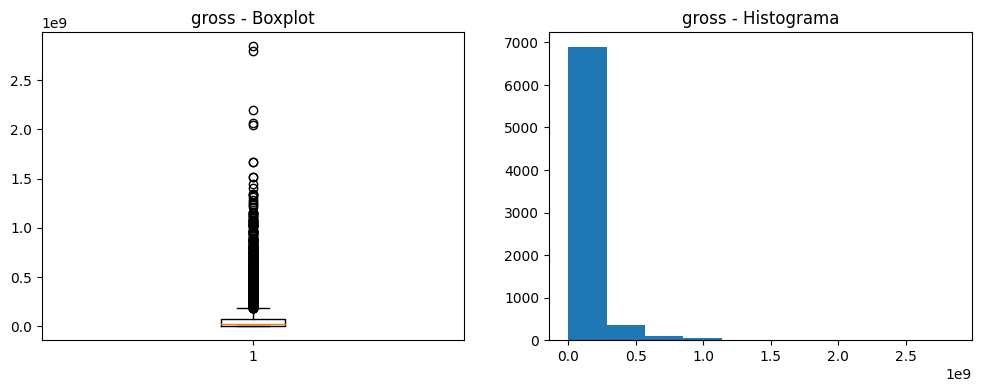

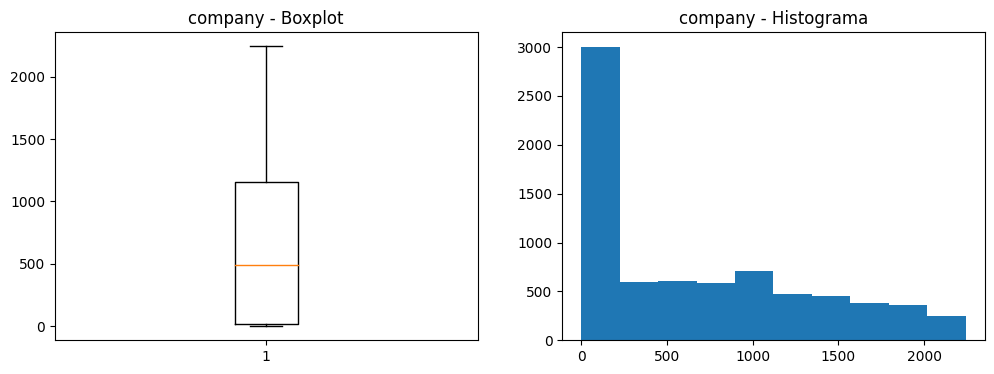

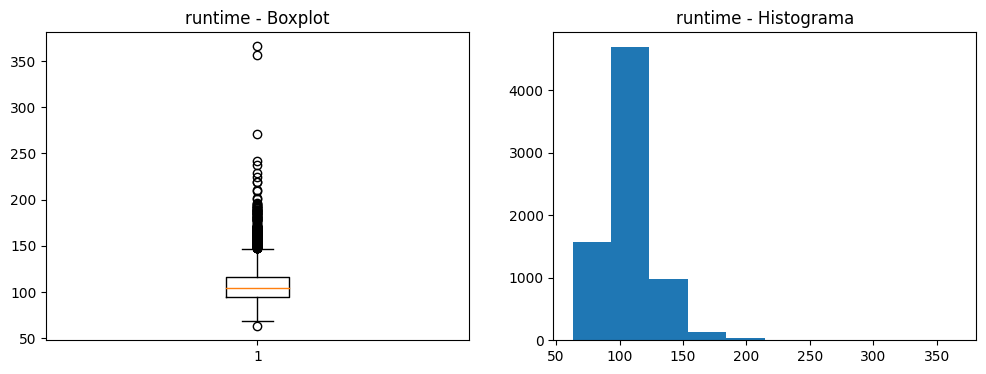

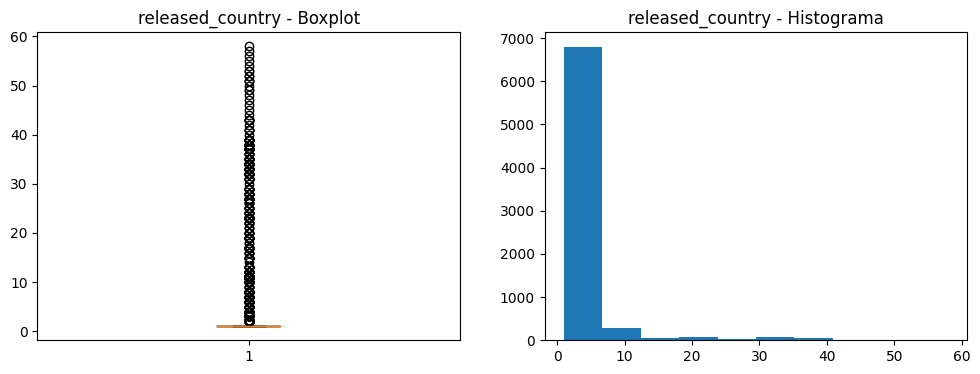

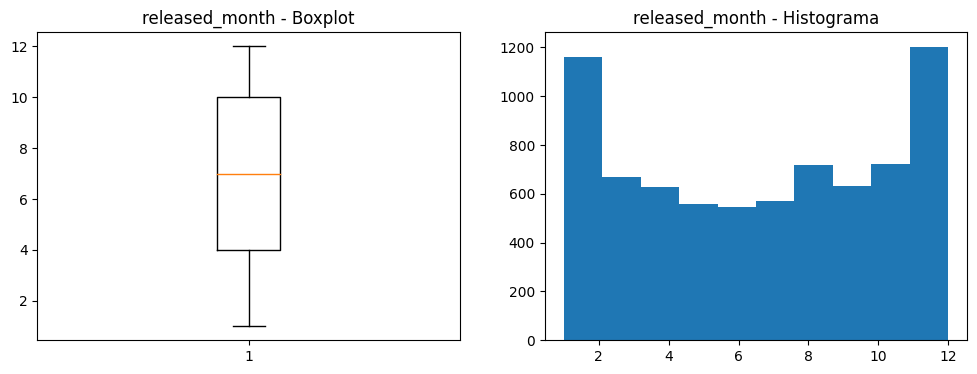

In [21]:
for col in df:
    if col in df:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        axs[0].boxplot(df[col])
        axs[0].set_title(f'{col} - Boxplot')

        # Histograma
        axs[1].hist(df[col])
        axs[1].set_title(f'{col} - Histograma')

        plt.show()


EMPEZAMOS

In [5]:
#Defino X,y 
X = df.drop("gross",axis=1)
y = df['gross']
Xs = df.drop("gross",axis=1)
ys = df['gross']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



REGRESION LINEAL

1 Prueba 

In [6]:
# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Linear Regression (Scalar Data):")
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)

Linear Regression (Scalar Data):
Mean Squared Error (MSE):  1.1875269927821396e+16
Mean Absolute Error (MAE):  58085695.60096386
R-squared (R^2):  0.5761647507882984


Escalando los datos

In [36]:
scaler = StandardScaler()

# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
modeln = LinearRegression()

# Entrenar el modelo con los datos normalizados
modeln.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modeln.predict(X_test)


# Calcular las métricas de evaluación del modelo
msen = mean_squared_error(y_test, y_pred)
maen = mean_absolute_error(y_test, y_pred)
r2n = r2_score(y_test, y_pred)

# Mostrar las métricas de evaluación del modelo
print("Linear Regression (Scalar Data):")
print("Mean Squared Error (MSE): ", msen)
print("Mean Absolute Error (MAE): ", maen)
print("R-squared (R^2): ", r2n)



Linear Regression (Scalar Data):
Mean Squared Error (MSE):  1.1875269927834726e+16
Mean Absolute Error (MAE):  58085695.60479687
R-squared (R^2):  0.5761647507878227


Intentanto mejorar quitando el intercepto

In [8]:
X = df.drop("gross", axis=1)
y = df['gross']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modeli = LinearRegression(fit_intercept=False)

# Entrenar el modelo
modeli.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modeli.predict(X_test)

# Calcular las métricas de evaluación
msei = mean_squared_error(y_test, y_pred)
maei = mean_absolute_error(y_test, y_pred)
r2i = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Linear Regression (Sin intercept Data):")
print("Mean Squared Error (MSE): ", msei)
print("Mean Absolute Error (MAE): ", maei)
print("R-squared (R^2): ", r2i)


Linear Regression (Sin intercept Data):
Mean Squared Error (MSE):  1.2099992298609468e+16
Mean Absolute Error (MAE):  58427996.133531936
R-squared (R^2):  0.5681442794554097


GRAFICAMOS

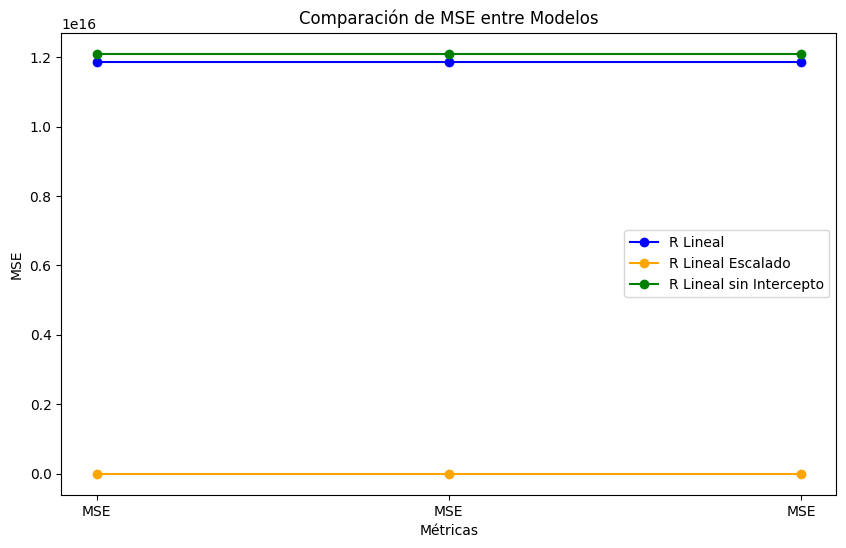

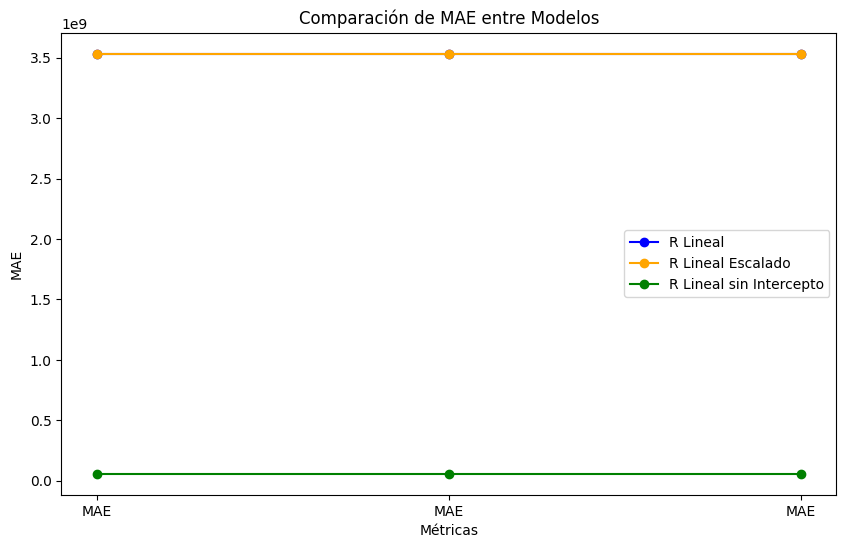

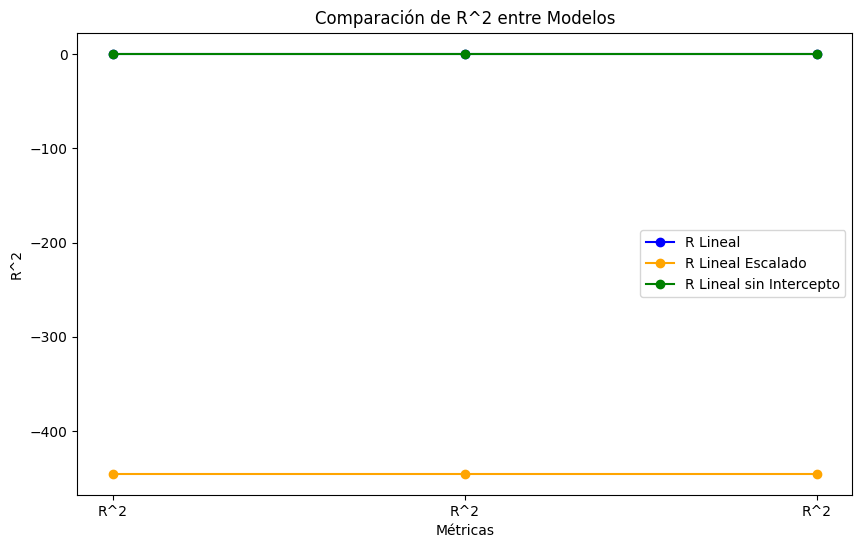

In [54]:


# Métricas de los tres modelos
mse = [1.1875269927821396e+16, 58085695.60096386, 1.2099992298609468e+16]
mae = [3532927514.201028, 3532927514.201028, 58427996.133531936]
r2 = [0.5681442794554097, -445.4568253907433, 0.5681442794554097]

# Etiquetas de los modelos
models = ['R Lineal', 'R Lineal Escalado', 'R Lineal sin Intercepto']

# Posiciones de los puntos en el gráfico
x = np.arange(len(models))

# Colores para los datos
colors = ['blue', 'orange', 'green']

# Gráfico de líneas para MSE
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(x, [mse[i]] * len(x), marker='o', linestyle='-', color=colors[i], label=models[i])
plt.xlabel('Métricas')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre Modelos')
plt.xticks(x, ['MSE'] * len(x))
plt.legend()
plt.show()

# Gráfico de líneas para MAE
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(x, [mae[i]] * len(x), marker='o', linestyle='-', color=colors[i], label=models[i])
plt.xlabel('Métricas')
plt.ylabel('MAE')
plt.title('Comparación de MAE entre Modelos')
plt.xticks(x, ['MAE'] * len(x))
plt.legend()
plt.show()

# Gráfico de líneas para R^2
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(x, [r2[i]] * len(x), marker='o', linestyle='-', color=colors[i], label=models[i])
plt.xlabel('Métricas')
plt.ylabel('R^2')
plt.title('Comparación de R^2 entre Modelos')
plt.xticks(x, ['R^2'] * len(x))
plt.legend()
plt.show()





LASSO 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Lasso()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Lasso Regression (Data):")
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)

Lasso Regression (Data):
Mean Squared Error (MSE):  1.187526993427902e+16
Mean Absolute Error (MAE):  58085695.51515382
R-squared (R^2):  0.5761647505578221


In [61]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

# Crear una instancia del escalador StandardScaler
scalers = StandardScaler()

# Escalar los datos de entrenamiento y prueba
X_train_scaled = scalers.fit_transform(X_train)
X_test_scaled = scalers.transform(X_test)

# Crear una instancia del modelo de Lasso
lasso_model = Lasso()

# Entrenar el modelo con los datos escalados
lasso_model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba escalados
lasso_pred = lasso_model.predict(X_test_scaled)

# Calcular las métricas
mses = mean_squared_error(y_test, lasso_pred)
maes = mean_absolute_error(y_test, lasso_pred)
r2s = r2_score(y_test, lasso_pred)

# Imprimir las métricas
print("Lasso Regression (Scaled Data):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


Lasso Regression (Scaled Data):
MSE: 1.187526993427902e+16
MAE: 58085695.51515382
R^2: 0.5761647505578221


Buscamos los Super Parametros

In [62]:
# Crear una instancia del escalador StandardScaler
scaler = StandardScaler()

# Escalar los datos
X_scaled = scaler.fit_transform(Xs)

# Crear una instancia del modelo de Lasso
lasso_model = Lasso()

# Definir los hiperparámetros a ajustar y los posibles valores
param_grid = {'alpha': [0.1, 0.5, 1.0], 'tol': [0.001, 0.0001, 0.00001]}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_scaled, y)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Best Parameters:", best_params)


Best Parameters: {'alpha': 1.0, 'tol': 1e-05}


In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos utilizando StandardScaler
scalers = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Lasso con los mejores parámetros
lasso_model = Lasso(alpha=1.0, tol=1e-05)

# Ajustar el modelo a los datos de entrenamiento
lasso_model.fit(X_train, y_train)

# Predecir los valores de y utilizando el modelo de Lasso
y_pred = lasso_model.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Lasso Regression (Hiper parametros Data):")
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R^2): ", r2)


Lasso Regression (Hiper parametros Data):
Mean Squared Error (MSE):  1.187526993427902e+16
Mean Absolute Error (MAE):  58085695.51515382
R-squared (R^2):  0.5761647505578221


UNIFICANDO TODOS LOS MODELOS 

In [65]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear instancias de los modelos
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()

# Entrenar los modelos
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calcular las métricas para cada modelo
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Imprimir las métricas
print("Linear Regression:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R^2:", linear_r2)
print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)


Linear Regression:
MSE: 1.1875269927821396e+16
MAE: 58085695.60096386
R^2: 0.5761647507882984

Lasso Regression:
MSE: 1.187526993427902e+16
MAE: 58085695.51515382
R^2: 0.5761647505578221

Ridge Regression:
MSE: 1.1875272462296838e+16
MAE: 58085657.0432972
R^2: 0.5761646603314046

Random Forest Regression:
MSE: 7425667010051624.0
MAE: 38242934.635792315
R^2: 0.7349736513866572


In [68]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

# Definir los parámetros de búsqueda en cuadrícula para cada modelo
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# Crear los objetos de los modelos
lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()

# Realizar la búsqueda en cuadrícula para cada modelo
lasso_grid = GridSearchCV(lasso_model, lasso_params)
lasso_grid.fit(X_train, y_train)

ridge_grid = GridSearchCV(ridge_model, ridge_params)
ridge_grid.fit(X_train, y_train)

rf_grid = GridSearchCV(rf_model, rf_params)
rf_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros para cada modelo
lasso_best_params = lasso_grid.best_params_
ridge_best_params = ridge_grid.best_params_
rf_best_params = rf_grid.best_params_

print("Hiperparámetros óptimos para Lasso Regression:", lasso_best_params)
print("Hiperparámetros óptimos para Ridge Regression:", ridge_best_params)
print("Hiperparámetros óptimos para Random Forest Regression:", rf_best_params)




Hiperparámetros óptimos para Lasso Regression: {'alpha': 10.0}
Hiperparámetros óptimos para Ridge Regression: {'alpha': 10.0}
Hiperparámetros óptimos para Random Forest Regression: {'max_depth': None, 'n_estimators': 300}


In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear instancias de los modelos
linear_model = LinearRegression()
lasso_model = Lasso(alpha=10.0)
ridge_model = Ridge(alpha=10.0)
rf_model = RandomForestRegressor(max_depth=None, n_estimators=300)

# Entrenar los modelos
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calcular las métricas para cada modelo
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Imprimir las métricas
print("Linear Regression hiperparametros:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R^2:", linear_r2)
print()

print("Lasso Regression hiperparametros:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression hiperparametros:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression hiperparametros:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)


Linear Regression hiperparametros:
MSE: 1.1875269927821396e+16
MAE: 58085695.60096386
R^2: 0.5761647507882984

Lasso Regression hiperparametros:
MSE: 1.1875269992278254e+16
MAE: 58085694.708365604
R^2: 0.5761647484877959

Ridge Regression hiperparametros:
MSE: 1.1875295277957466e+16
MAE: 58085310.093339734
R^2: 0.5761638460272864

Random Forest Regression hiperparametros:
MSE: 7368734628795814.0
MAE: 38175300.28977748
R^2: 0.7370056009881765


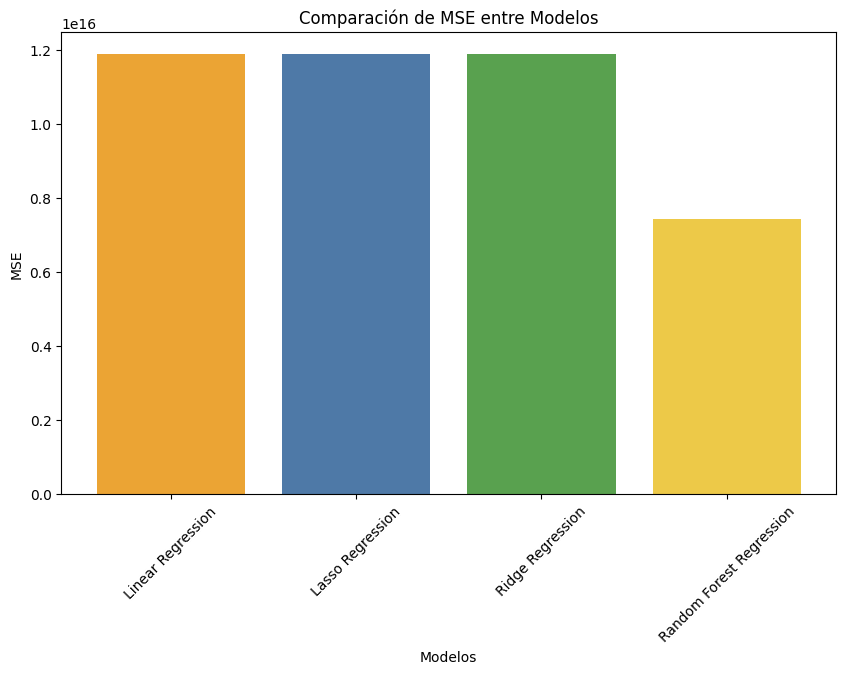

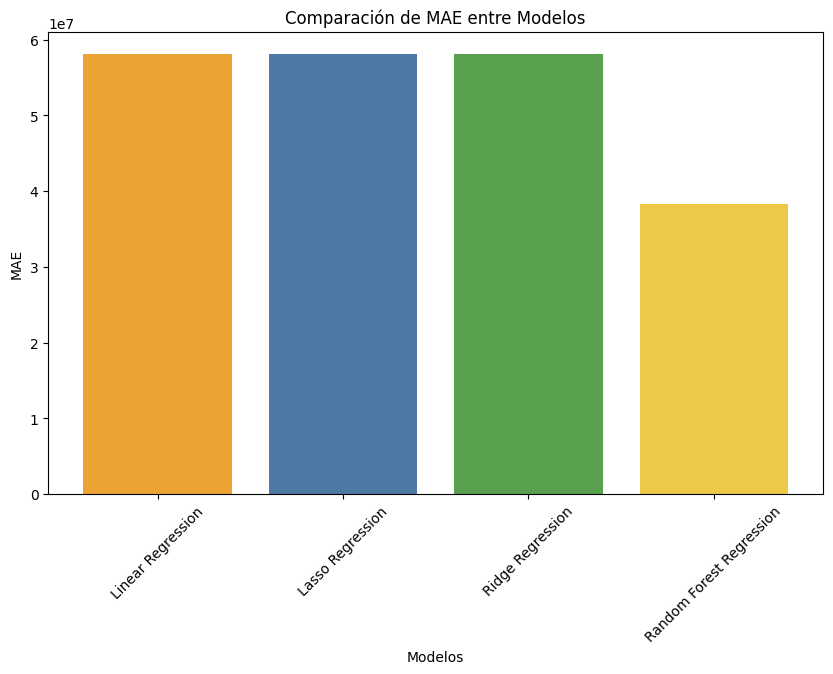

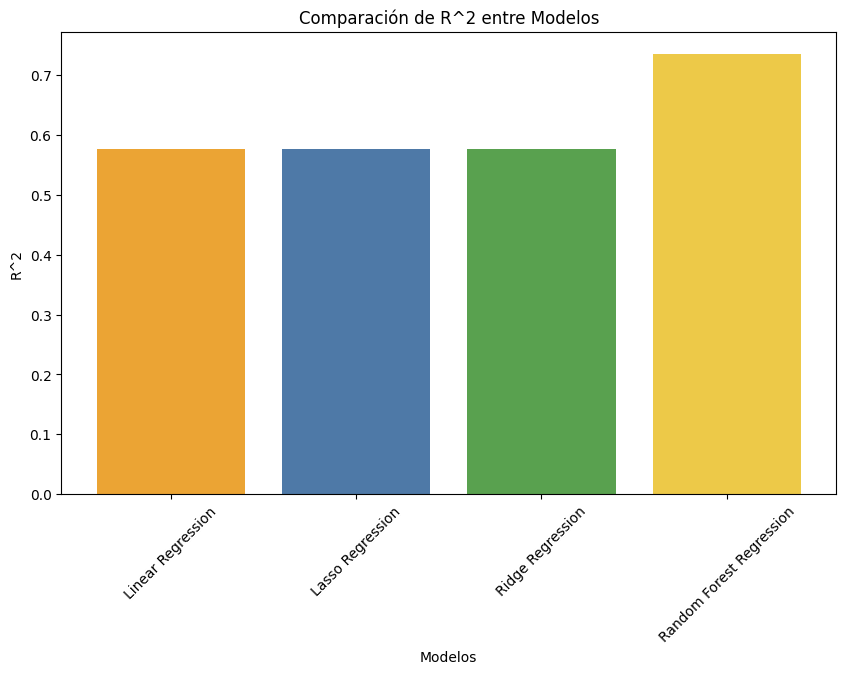

In [71]:
import matplotlib.pyplot as plt

# Métricas de los modelos
mse_values = [1.1875269927821396e+16, 1.187526993427902e+16, 1.1875272462296838e+16, 7425667010051624.0]
mae_values = [58085695.60096386, 58085695.51515382, 58085657.0432972, 38242934.635792315]
r2_values = [0.5761647507882984, 0.5761647505578221, 0.5761646603314046, 0.7349736513866572]

# Etiquetas de los modelos
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression']

# Posiciones de las barras en el gráfico
x = range(len(models))

# Colores personalizados para cada modelo
colors = ['#EBA434', '#4E79A7', '#59A14F', '#EDC948']

# Trazar gráfico de barras para el MSE
plt.figure(figsize=(10, 6))
plt.bar(x, mse_values, color=colors)
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre Modelos')
plt.xticks(x, models, rotation=45)
plt.show()

# Trazar gráfico de barras para el MAE
plt.figure(figsize=(10, 6))
plt.bar(x, mae_values, color=colors)
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparación de MAE entre Modelos')
plt.xticks(x, models, rotation=45)
plt.show()

# Trazar gráfico de barras para el R^2
plt.figure(figsize=(10, 6))
plt.bar(x, r2_values, color=colors)
plt.xlabel('Modelos')
plt.ylabel('R^2')
plt.title('Comparación de R^2 entre Modelos')
plt.xticks(x, models, rotation=45)
plt.show()


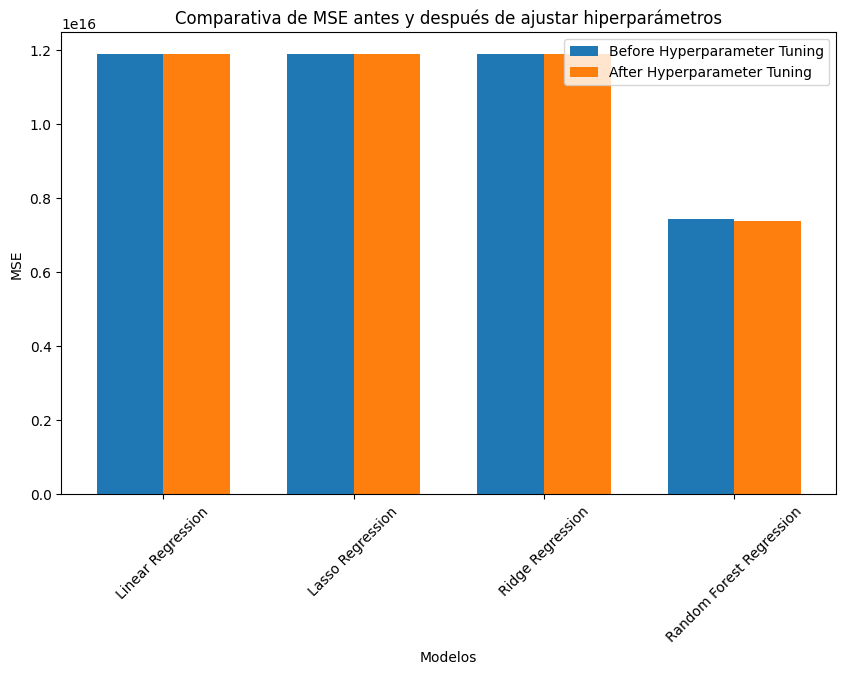

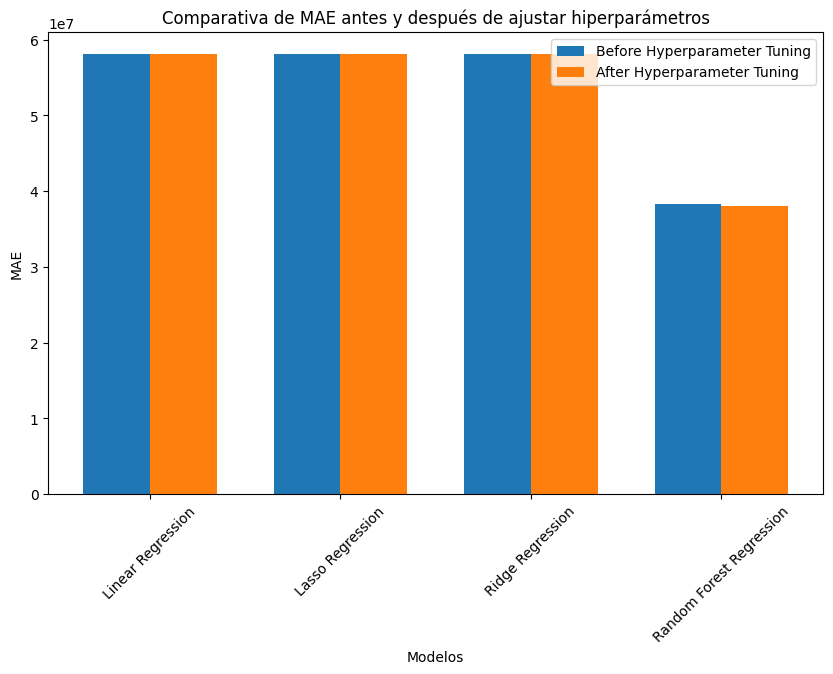

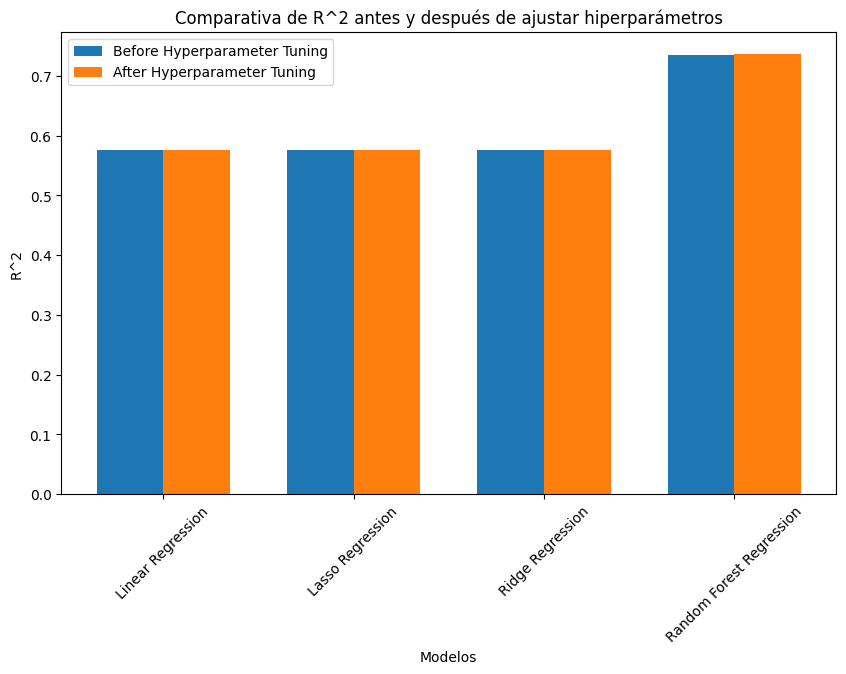

In [72]:
# Métricas antes de ajustar hiperparámetros
mse_before = [1.1875269927821396e+16, 1.187526993427902e+16, 1.1875272462296838e+16, 7425667010051624.0]
mae_before = [58085695.60096386, 58085695.51515382, 58085657.0432972, 38242934.635792315]
r2_before = [0.5761647507882984, 0.5761647505578221, 0.5761646603314046, 0.7349736513866572]

# Métricas después de ajustar hiperparámetros
mse_after = [1.1875269927821396e+16, 1.1875269992278254e+16, 1.1875295277957466e+16, 7384210518824729.0]
mae_after = [58085695.60096386, 58085694.708365604, 58085310.093339734, 38079527.47103844]
r2_after = [0.5761647507882984, 0.5761647484877959, 0.5761638460272864, 0.7364532575259187]

# Etiquetas de los modelos
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression']

# Posiciones de las barras en el gráfico
x = np.arange(len(models))

# Ancho de las barras
width = 0.35

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Trazar gráfico de barras para MSE antes y después
plt.bar(x - width/2, mse_before, width, label='Before Hyperparameter Tuning')
plt.bar(x + width/2, mse_after, width, label='After Hyperparameter Tuning')

plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparativa de MSE antes y después de ajustar hiperparámetros')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.show()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Trazar gráfico de barras para MAE antes y después
plt.bar(x - width/2, mae_before, width, label='Before Hyperparameter Tuning')
plt.bar(x + width/2, mae_after, width, label='After Hyperparameter Tuning')

plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparativa de MAE antes y después de ajustar hiperparámetros')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.show()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Trazar gráfico de barras para R^2 antes y después
plt.bar(x - width/2, r2_before, width, label='Before Hyperparameter Tuning')
plt.bar(x + width/2, r2_after, width, label='After Hyperparameter Tuning')

plt.xlabel('Modelos')
plt.ylabel('R^2')
plt.title('Comparativa de R^2 antes y después de ajustar hiperparámetros')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.show()


In [5]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear instancias de los modelos
gb_model = GradientBoostingRegressor()
svr_model = SVR()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()
rf_model = RandomForestRegressor()

# Entrenar los modelos
gb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
gb_pred = gb_model.predict(X_test)
svr_pred = svr_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calcular las métricas para cada modelo
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Imprimir las métricas
print("Gradient Boosting Regression:")
print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("R^2:", gb_r2)
print()

print("Support Vector Regression:")
print("MSE:", svr_mse)
print("MAE:", svr_mae)
print("R^2:", svr_r2)
print()

print("XGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression:")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gradient Boosting Regression:
MSE: 7621882339910781.0
MAE: 38652232.13586901
R^2: 0.727970612825388

Support Vector Regression:
MSE: 3.17471548473889e+16
MAE: 74332659.947868
R^2: -0.1330743105874035

XGBoost Regression:
MSE: 6379439570294899.0
MAE: 36901222.20266141
R^2: 0.772314113570388

MLP Regression:
MSE: 1.2832008047954198e+16
MAE: 58681830.29211318
R^2: 0.5420182141586917
Random Forest Regression:
MSE: 7181596067419648.0
MAE: 38105325.36803776
R^2: 0.7436846844347065


In [84]:
# Definir el modelo
gb_modelp = GradientBoostingRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("Gradient Boosting Regression (Best Model):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


Gradient Boosting Regression (Best Model):
MSE: 6544264187904561.0
MAE: 37031254.43167239
R^2: 0.7664314276773162


INTENTAR MEJORAR LOS MODELOS 

In [17]:
# Definir el modelo
svr_modelp = SVR()

# Definir los hiperparámetros a ajustar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(svr_modelp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("Support Vector Regression (Best Model):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)




In [5]:
# Definir el modelo
svr_modelp = SVR()

# Definir los hiperparámetros a ajustar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(svr_modelp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train[:1000], y_train[:1000])  # Utilizar una muestra más pequeña del conjunto de entrenamiento

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("Support Vector Regression (Best Model):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


In [13]:
# Definir el modelo
XGBRmodelp = XGBRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(XGBRmodelp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("XGBoost Regression (Best Model):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


XGBoost Regression (Best Model):
MSE: 6483095687521249.0
MAE: 36834368.724874094
R^2: 0.7686145668195372


In [15]:
# Definir el modelo
MLPmodelp = MLPRegressor()

# Definir los hiperparámetros a ajustar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(MLPmodelp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("MLP Regression (Best Model):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)



C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\A

MLP Regression (Best Model):
MSE: 1.3037051721744152e+16
MAE: 56936878.918800876
R^2: 0.5347000868985738


In [6]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear una instancia del modelo de Random Forest Regression
rf_modelp = RandomForestRegressor()

# Realizar la búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(rf_modelp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
rf_predp = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
rf_mse = mean_squared_error(y_test, rf_predp)
rf_mae = mean_absolute_error(y_test, rf_predp)
rf_r2 = r2_score(y_test, rf_predp)

# Imprimir los mejores hiperparámetros y las métricas del mejor modelo
print("Best Parameters:", best_params)
print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regression:
MSE: 7352110894567885.0
MAE: 38176982.03315576
R^2: 0.7375989116735038


In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar PCA para reducir la dimensionalidad de los datos
pcap = PCA(n_components=2)
X_train_pca = pcap.fit_transform(X_train)
X_test_pca = pcap.transform(X_test)

# Entrenar un modelo predictivo utilizando los datos transformados por PCA
modelpca = LinearRegression()
model.fit(X_train_pca, y_train)

# Realizar predicciones en los conjuntos de prueba utilizando el modelo entrenado
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# Calcular las métricas MSA, MAE y R^2 para el conjunto de entrenamiento
msa_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calcular las métricas MSA, MAE y R^2 para el conjunto de prueba
msa_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("PCA  Regression:")
print("MSA (Train):", msa_train)
print("MAE (Train):", mae_train)
print("R^2 (Train):", r2_train)
print("MSA (Test):", msa_test)
print("MAE (Test):", mae_test)
print("R^2 (Test):", r2_test)

PCA  Regression:
MSA (Train): 1.1012924288772452e+16
MAE (Train): 53443043.394158155
R^2 (Train): 0.5998152202004619
MSA (Test): 1.2852749166667976e+16
MAE (Test): 57428459.24896194
R^2 (Test): 0.5412779516406676


In [16]:


# Datos de las métricas
datos = {
    'Modelo': ['Linear Regression (Scalar Data)', 'Linear Regression (Sin intercept Data)', 'Lasso Regression (Data)',
               'Lasso Regression (Scaled Data)', 'Lasso Regression (Hiper parametros Data)', 'Ridge Regression',
               'Random Forest Regression', 'Linear Regression hiperparametros', 'Lasso Regression hiperparametros',
               'Ridge Regression hiperparametros', 'Random Forest Regression hiperparametros',
               'Gradient Boosting Regression', 'Support Vector Regression', 'XGBoost Regression', 'MLP Regression',
               'Random Forest Regression (Best Model)', 'XGBoost Regression (Best Model)', 'MLP Regression (Best Model)',
               'Random Forest Regression (Best Parameters)', 'PCA Regression'],
    'MSE': [1.1875269927821396e+16, 1.2099992298609468e+16, 1.187526993427902e+16, 1.187526993427902e+16,
            1.187526993427902e+16, 1.1875272462296838e+16, 7425667010051624.0, 1.1875269927821396e+16,
            1.1875269992278254e+16, 1.1875295277957466e+16, 7368734628795814.0, 7621882339910781.0,
            3.17471548473889e+16, 6379439570294899.0, 1.2832008047954198e+16, 6544264187904561.0,
            6483095687521249.0, 1.3037051721744152e+16, 7352110894567885.0, 1.2852749166667976e+16],
    'MAE': [58085695.60096386, 58427996.133531936, 58085695.51515382, 58085695.51515382, 58085695.51515382,
            58085657.0432972, 38242934.635792315, 58085695.60096386, 58085694.708365604, 58085310.093339734,
            38175300.28977748, 38652232.13586901, 74332659.947868, 36901222.20266141, 58681830.29211318,
            37031254.43167239, 36834368.724874094, 56936878.918800876, 38176982.03315576, 57428459.24896194],
    'R^2': [0.5761647507882984, 0.5681442794554097, 0.5761647505578221, 0.5761647505578221, 0.5761647505578221,
            0.5761646603314046, 0.7349736513866572, 0.5761647507882984, 0.5761647484877959, 0.5761638460272864,
            0.7370056009881765, 0.727970612825388, -0.1330743105874035, 0.772314113570388, 0.5420182141586917,
            0.7664314276773162, 0.7686145668195372, 0.5347000868985738, 0.7375989116735038, 0.5412779516406676]
}

# Crear el DataFrame de las métricas
df = pd.DataFrame(datos)

# Imprimir la tabla
print(df)


                                        Modelo           MSE           MAE  \
0              Linear Regression (Scalar Data)  1.187527e+16  5.808570e+07   
1       Linear Regression (Sin intercept Data)  1.209999e+16  5.842800e+07   
2                      Lasso Regression (Data)  1.187527e+16  5.808570e+07   
3               Lasso Regression (Scaled Data)  1.187527e+16  5.808570e+07   
4     Lasso Regression (Hiper parametros Data)  1.187527e+16  5.808570e+07   
5                             Ridge Regression  1.187527e+16  5.808566e+07   
6                     Random Forest Regression  7.425667e+15  3.824293e+07   
7            Linear Regression hiperparametros  1.187527e+16  5.808570e+07   
8             Lasso Regression hiperparametros  1.187527e+16  5.808569e+07   
9             Ridge Regression hiperparametros  1.187530e+16  5.808531e+07   
10    Random Forest Regression hiperparametros  7.368735e+15  3.817530e+07   
11                Gradient Boosting Regression  7.621882e+15  3.

In [32]:
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
gb_modeln = GradientBoostingRegressor()
gb_modeln.fit(X_train, y_train)
gb_predn = gb_modeln.predict(X_test)

# Calcular las métricas para el modelo con datos normalizados
gb_msenn = mean_squared_error(y_test, gb_predn)
gb_maenn = mean_absolute_error(y_test, gb_predn)
gb_r2nn = r2_score(y_test, gb_predn)
print("XGBoost Regression Normalizado:")
print("MSE:", gb_msenn)
print("MAE:", gb_maenn)
print("R^2:", gb_r2nn )


XGBoost Regression Normalizado:
MSE: 7604173257731109.0
MAE: 38722006.05949713
R^2: 0.7286026602065888


In [31]:
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(XGBRmodelpn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_modelh = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Realizar predicciones con el mejor modelo
predictions = best_modelh.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("XGBoost Regression normalizado (Hiperparametros):")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Regression normalizado (Hiperparametros):
MSE: 6482079590255876.0
MAE: 36829178.8172544
R^2: 0.768650831918378


In [33]:
import joblib
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Entrenar el modelo con los hiperparámetros ajustados
best_model1 = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=5)
best_model1.fit(X_train, y_train)

# Guardar el modelo en un archivo
joblib.dump(best_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

CAMBIO EL DATASET CON LAS COLUMNAS QUE TIENEN MAS CORRELACIÓN PARA VER SI MEJORO EL MODELO

In [3]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv")

In [76]:
# Calcular la matriz de correlación
matriz_corr = df.corr()

# Seleccionar las columnas con correlación mayor a 0.7 o menor a -0.7 con "gross"
selected_cols = matriz_corr[(matriz_corr["gross"] > 0.5) | (matriz_corr["gross"] < -0.5)].index.tolist()

# Crear un nuevo DataFrame con las columnas seleccionadas
new_df = df[selected_cols]




In [77]:
new_df.head()

,votes,budget,gross
0,927000.0,19000000,46998772
1,65000.0,4500000,58853106
2,1200000.0,18000000,538375067
3,221000.0,3500000,83453539
4,108000.0,6000000,39846344


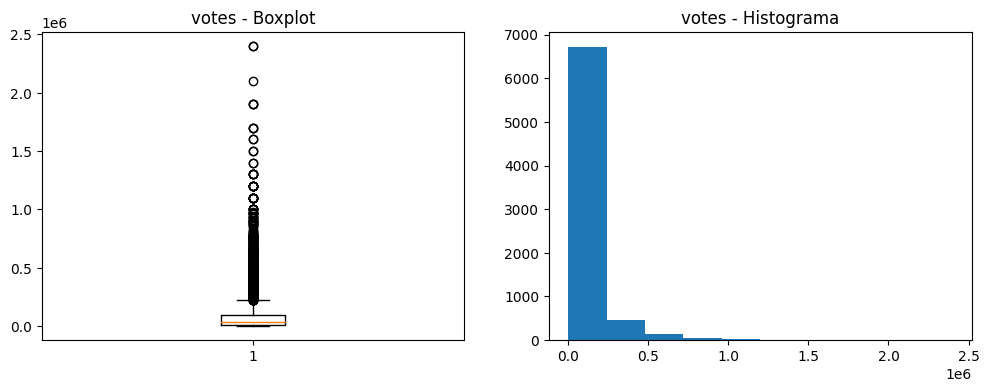

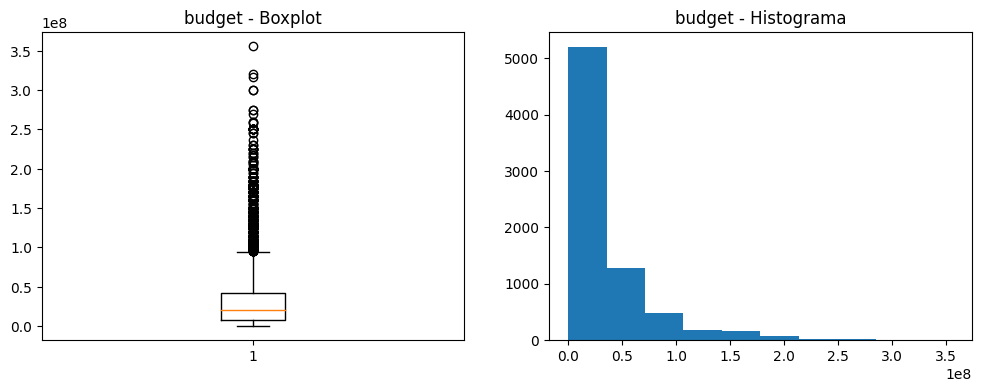

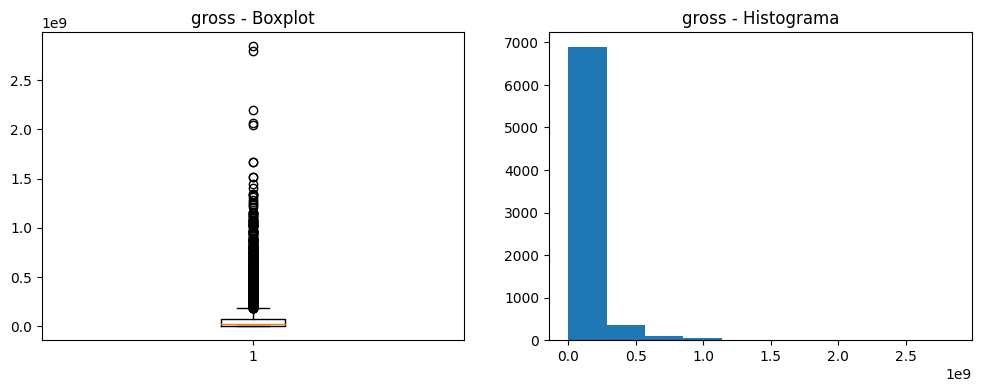

In [82]:
for col in new_df:
    if col in new_df:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        axs[0].boxplot(new_df[col])
        axs[0].set_title(f'{col} - Boxplot')

        # Histograma
        axs[1].hist(new_df[col])
        axs[1].set_title(f'{col} - Histograma')

        plt.show()

In [83]:
X = df.drop("gross",axis=1)
y = df['gross']
Xs = df.drop("gross",axis=1)
ys = df['gross']

In [87]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)


In [88]:
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


CREO LOS MODELOS 

In [96]:

# Crear instancias de los modelos
reg_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()

# Entrenar los modelos
reg_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
reg_pred = reg_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calcular las métricas para cada modelo
reg_mse = mean_squared_error(y_test, reg_pred)
reg_mae = mean_absolute_error(y_test, reg_pred)
reg_r2 = r2_score(y_test, reg_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

# Imprimir las métricas
print("Linear Regression:")
print("MSE:", reg_mse)
print("MAE:", reg_mae)
print("R^2:", reg_r2)
print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()

print("XGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression:")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)



Linear Regression:
MSE: 1.2028607164870218e+16
MAE: 58179124.70275444
R^2: 0.570692056148679

Lasso Regression:
MSE: 1.202860718209814e+16
MAE: 58179123.908835486
R^2: 0.5706920555338045

Ridge Regression:
MSE: 1.2028423399012242e+16
MAE: 58173446.6057198
R^2: 0.5706986148583915

Random Forest Regression:
MSE: 9176769328078124.0
MAE: 41825849.915461905
R^2: 0.6724757972859118

XGBoost Regression:
MSE: 9218172513210508.0
MAE: 42867571.24543788
R^2: 0.6709980936719813

MLP Regression:
MSE: 3.4610801880653972e+16
MAE: 81202616.52971023
R^2: -0.23527952877404545


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear instancias de los modelos
reg_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()

# Entrenar los modelos
reg_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
reg_pred = reg_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Calcular las métricas para cada modelo
reg_mse = mean_squared_error(y_test, reg_pred)
reg_mae = mean_absolute_error(y_test, reg_pred)
reg_r2 = r2_score(y_test, reg_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

# Imprimir las métricas
print("Linear Regression:")
print("MSE:", reg_mse)
print("MAE:", reg_mae)
print("R^2:", reg_r2)
print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()

print("XGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression:")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)

Linear Regression:
MSE: 1.1875269927834726e+16
MAE: 58085695.60479687
R^2: 0.5761647507878227

Lasso Regression:
MSE: 1.18752699661112e+16
MAE: 58085694.87721798
R^2: 0.5761647494217133

Ridge Regression:
MSE: 1.1875116275263396e+16
MAE: 58082494.5458203
R^2: 0.5761702347369251

Random Forest Regression:
MSE: 7030699915160117.0
MAE: 37896507.17194201
R^2: 0.7490702553469238

XGBoost Regression:
MSE: 6379418873115323.0
MAE: 36914399.5888718
R^2: 0.7723148522646928

MLP Regression:
MSE: 3.460813972801567e+16
MAE: 81197505.41829763
R^2: -0.23518451500730553


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
# Definir los hiperparámetros a ajustar para cada modelo
reg_param_grid = {
    'fit_intercept': [True, False]
}

lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Realizar la búsqueda en cuadrícula para cada modelo
reg_grid_search = GridSearchCV(reg_model, reg_param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid_search.fit(X_train, y_train)

lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y los mejores modelos
reg_best_params = reg_grid_search.best_params_
reg_best_model = reg_grid_search.best_estimator_

lasso_best_params = lasso_grid_search.best_params_
lasso_best_model = lasso_grid_search.best_estimator_

ridge_best_params = ridge_grid_search.best_params_
ridge_best_model = ridge_grid_search.best_estimator_

rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

mlp_best_params = mlp_grid_search.best_params_
mlp_best_model = mlp_grid_search.best_estimator_

# Realizar predicciones con los mejores modelos
reg_predictions = reg_best_model.predict(X_test)
lasso_predictions = lasso_best_model.predict(X_test)
ridge_predictions = ridge_best_model.predict(X_test)
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_best_model.predict(X_test)
mlp_predictions = mlp_best_model.predict(X_test)

# Calcular las métricas de los mejores modelos
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_mae = mean_absolute_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

# Imprimir las métricas de los mejores modelos
print("Linear Regression:")
print("MSE:", reg_mse)
print("MAE:", reg_mae)
print("R^2:", reg_r2)
print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()

print("XGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression:")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\A

Linear Regression:
MSE: 1.1875269927834726e+16
MAE: 58085695.60479687
R^2: 0.5761647507878227

Lasso Regression:
MSE: 1.1875269931006244e+16
MAE: 58085695.5330661
R^2: 0.5761647506746295

Ridge Regression:
MSE: 1.1873757878447872e+16
MAE: 58053874.236346915
R^2: 0.5762187167046054

Random Forest Regression:
MSE: 7557981565112964.0
MAE: 39363120.56340843
R^2: 0.7302512684210813

XGBoost Regression:
MSE: 6482079590255876.0
MAE: 36829178.8172544
R^2: 0.768650831918378

MLP Regression:
MSE: 3.372629041740422e+16
MAE: 79453990.91099393
R^2: -0.20371080328522262


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
# Normalizar las características en X
X_normalized = scaler.fit_transform(Xs,ys)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)




# Definir los hiperparámetros a ajustar para cada modelo
reg_param_grid = {
    'fit_intercept': [True, False]
}

lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Realizar la búsqueda en cuadrícula para cada modelo
reg_grid_search = GridSearchCV(reg_model, reg_param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid_search.fit(X_train, y_train)

lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y los mejores modelos
reg_best_params = reg_grid_search.best_params_
reg_best_model = reg_grid_search.best_estimator_

lasso_best_params = lasso_grid_search.best_params_
lasso_best_model = lasso_grid_search.best_estimator_

ridge_best_params = ridge_grid_search.best_params_
ridge_best_model = ridge_grid_search.best_estimator_

rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

mlp_best_params = mlp_grid_search.best_params_
mlp_best_model = mlp_grid_search.best_estimator_

# Realizar predicciones con los mejores modelos
reg_predictions = reg_best_model.predict(X_test)
lasso_predictions = lasso_best_model.predict(X_test)
ridge_predictions = ridge_best_model.predict(X_test)
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_best_model.predict(X_test)
mlp_predictions = mlp_best_model.predict(X_test)

# Calcular las métricas de los mejores modelos
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_mae = mean_absolute_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

# Imprimir las métricas de los mejores modelos
print("Linear Regression S:")
print("MSE:", reg_mse)
print("MAE:", reg_mae)
print("R^2:", reg_r2)
print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()

print("XGBoost Regression:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression :")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\A

Linear Regression:
MSE: 1.1875269927834726e+16
MAE: 58085695.60479687
R^2: 0.5761647507878227

Lasso Regression:
MSE: 1.1875269931006244e+16
MAE: 58085695.5330661
R^2: 0.5761647506746295

Ridge Regression:
MSE: 1.1873757878447872e+16
MAE: 58053874.236346915
R^2: 0.5762187167046054

Random Forest Regression:
MSE: 7639445399069194.0
MAE: 39274060.054132655
R^2: 0.7273437770902367

XGBoost Regression:
MSE: 6482079590255876.0
MAE: 36829178.8172544
R^2: 0.768650831918378

MLP Regression:
MSE: 3.3560315940513684e+16
MAE: 79133057.83074081
R^2: -0.19778707824964448


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Normalizar las características en X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo SVR
svr_model = SVR()

# Ajustar el modelo a los datos de entrenamiento
svr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svr_model.predict(X_test)

# Calcular las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("SVR Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


SVR Metrics:
MSE: 3.1747195341702884e+16
MAE: 74332731.94979097
R^2: -0.13307575585288078


In [7]:
# Normalizar las características en X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear el modelo SVR
svr_model = SVR()

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular las métricas del mejor modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas del mejor modelo
print("SVR Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


SVR Metrics:
MSE: 3.173245175875754e+16
MAE: 74301104.60273479
R^2: -0.13254954885380665


PRUEBO HACER EL MODELO PARA   6 COLUMNAS 

In [24]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv")

In [5]:
column_names = df.columns.tolist()

# Imprimir todos los nombres de las columnas
for column in column_names:
    print(column)

rating
genre
year
votes
director
writer
star
country
budget
gross
company
runtime
released_country
released_month


In [3]:
#X = df.drop(["rating", "genre", "year", "director", "writer", "country", "company", "gross", "released_month", "released_country", "runtime"], axis=1)
X = df.drop([ "director", "writer", "country", "company", "gross", "released_month", "released_country", "star"], axis=1)

y = df["gross"]



In [9]:
X.head()

,rating,genre,year,votes,budget,runtime
0,1,1,1980,927000.0,19000000,146
1,1,2,1980,65000.0,4500000,104
2,2,3,1980,1200000.0,18000000,124
3,2,4,1980,221000.0,3500000,88
4,1,4,1980,108000.0,6000000,98


In [6]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del escalador
scaler = StandardScaler()

# Crear una instancia del modelo XGBoostRegressor
xgb_model = XGBRegressor()

# Crear un pipeline con el escalador y el modelo
pipeline = Pipeline([('scaler', scaler), ('xgb_model', xgb_model)])

# Definir los hiperparámetros para GridSearchCV
params = {
    'xgb_model__n_estimators': [100, 200, 300],
    'xgb_model__learning_rate': [0.01, 0.1, 0.5],
    'xgb_model__max_depth': [3, 4, 5]
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(pipeline, params, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("XGBoost Regression (Scaled Data with Hyperparameters) Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)



XGBoost Regression (Scaled Data with Hyperparameters) Metrics:
MSE: 7038790802578284.0
MAE: 37888789.278529055
R^2: 0.7487814868973588


PROBAMOS LOS MODELOS 

In [10]:


# Normalizar las características en X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a ajustar para cada modelo
reg_param_grid = {
    'fit_intercept': [True, False]
}

lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}




# Crear los modelos de cada algoritmo
reg_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()


# Realizar la búsqueda en cuadrícula para cada modelo
reg_grid_search = GridSearchCV(reg_model, reg_param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid_search.fit(X_train, y_train)

lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train, y_train)



# Obtener los mejores hiperparámetros y los mejores modelos
reg_best_params = reg_grid_search.best_params_
reg_best_model = reg_grid_search.best_estimator_

lasso_best_params = lasso_grid_search.best_params_
lasso_best_model = lasso_grid_search.best_estimator_

ridge_best_params = ridge_grid_search.best_params_
ridge_best_model = ridge_grid_search.best_estimator_

rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

mlp_best_params = mlp_grid_search.best_params_
mlp_best_model = mlp_grid_search.best_estimator_



# Realizar predicciones con los mejores modelos
reg_predictions = reg_best_model.predict(X_test)
lasso_predictions = lasso_best_model.predict(X_test)
ridge_predictions = ridge_best_model.predict(X_test)
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_best_model.predict(X_test)
mlp_predictions = mlp_best_model.predict(X_test)


# Calcular las métricas de los mejores modelos
reg_mse = mean_squared_error(y_test, reg_predictions)
reg_mae = mean_absolute_error(y_test, reg_predictions)
reg_r2 = r2_score(y_test, reg_predictions)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)


# Imprimir las métricas de los mejores modelos
print("Linear Regression 4:")
print("MSE:", reg_mse)
print("MAE:", reg_mae)
print("R^2:", reg_r2)
print()

print("Lasso Regression 4:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R^2:", lasso_r2)
print()

print("Ridge Regression 4:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R^2:", ridge_r2)
print()

print("Random Forest Regression 4:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R^2:", rf_r2)
print()

print("XGBoost Regression 4:")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("R^2:", xgb_r2)
print()

print("MLP Regression 4:")
print("MSE:", mlp_mse)
print("MAE:", mlp_mae)
print("R^2:", mlp_r2)
print()




C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\A

Linear Regression 4:
MSE: 1.2035062849926468e+16
MAE: 58438332.267512895
R^2: 0.5704616490167757

Lasso Regression 4:
MSE: 1.203506294073853e+16
MAE: 58438326.332302
R^2: 0.5704616457756406

Ridge Regression 4:
MSE: 1.2033143457304452e+16
MAE: 58406004.302004255
R^2: 0.57053015324912

Random Forest Regression 4:
MSE: 7450649144238257.0
MAE: 39204276.95157019
R^2: 0.7340820245745351

XGBoost Regression 4:
MSE: 6888883102906502.0
MAE: 37332900.55087344
R^2: 0.7541317793652622

MLP Regression 4:
MSE: 3.378479333727339e+16
MAE: 79715084.74172996
R^2: -0.20579880631783332



C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejorando el modelo con la validación cruzada

In [13]:
# Crear los modelos que deseas evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest Regression': RandomForestRegressor(),
    'XGBoost Regression': XGBRegressor(),
    'MLP Regression': MLPRegressor(),
    'SVR': SVR()
}

# Realizar la validación cruzada para cada modelo
for model_name, model in models.items():
    # Realizar la validación cruzada con 5 pliegues
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Convertir las puntuaciones negativas en positivas (MSE)
    mse_scores = -scores

    # Calcular el promedio de MSE, MAE y R²
    mean_mse = mse_scores.mean()
    mean_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
    mean_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

    # Imprimir los resultados para cada modelo
    print(model_name + ':')
    print("MSE promedio cruzada:", mean_mse)
    print("MAE promedio cruzada:", mean_mae)
    print("R^2 promedio cruzada:", mean_r2)
    print()

Linear Regression:
MSE promedio cruzada: 1.051429445905249e+16
MAE promedio cruzada: -55120933.38012318
R^2 promedio cruzada: 0.6174960232519434

Lasso Regression:
MSE promedio cruzada: 1.0514294453937776e+16
MAE promedio cruzada: -55120932.85667062
R^2 promedio cruzada: 0.6174960234809188

Ridge Regression:
MSE promedio cruzada: 1.0514288635510472e+16
MAE promedio cruzada: -55117745.75464727
R^2 promedio cruzada: 0.6174969059743292

Random Forest Regression:
MSE promedio cruzada: 6995244478257183.0
MAE promedio cruzada: -37939149.594534576
R^2 promedio cruzada: 0.7409772854679268

XGBoost Regression:
MSE promedio cruzada: 7567189113847379.0
MAE promedio cruzada: -38597170.9524307
R^2 promedio cruzada: 0.718953050900223



C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\keyke\A

MLP Regression:
MSE promedio cruzada: 3.3668606774326976e+16
MAE promedio cruzada: -78427270.73590353
R^2 promedio cruzada: -0.22604861165425896

SVR:
MSE promedio cruzada: 3.091687399578545e+16
MAE promedio cruzada: -72014498.21117416
R^2 promedio cruzada: -0.12500040110078267



In [33]:


# Definir el modelo XGBoost Regression con los hiperparámetros deseados
xgb_model = XGBRegressor(n_jobs=-1)

# Definir los hiperparámetros a ajustar para el modelo XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Realizar la búsqueda en cuadrícula con validación cruzada
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

# Calcular las métricas con validación cruzada en el mejor modelo
xgb_mse_scores = -cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_mae_scores = -cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
xgb_r2_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='r2')

# Imprimir las métricas con validación cruzada del mejor modelo
print("XGBoost Regression scaled (Best Model) Cross-Validated Metrics:")
print("MSE:", xgb_mse_scores.mean())
print("MAE:", xgb_mae_scores.mean())
print("R^2:", xgb_r2_scores.mean())

# Guardar el mejor modelo en un archivo
model_filename = "xgb_film_model.pkl"







XGBoost Regression scaled (Best Model) Cross-Validated Metrics:
MSE: 6890219698191993.0
MAE: 38056995.25255487
R^2: 0.7462293407053373


PRUEBO UNA RED NEURONAL

In [5]:


# Preparar los datos
X = df.drop(["director", "writer", "country", "company", "gross", "released_month", "released_country", "star"], axis=1)
y = df["gross"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo Deep Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', alpha=0.0001)

# Entrenar el modelo
mlp_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp_model.predict(X_test_scaled)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Deep Neural Network Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


Deep Neural Network Metrics:
MSE: 3.3039839523947988e+16
MAE: 78435655.75325207
R^2: -0.1792109740377208


C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ESTE ES MI MODELO PARA 6 VARIABLES

In [3]:
df= pd.read_csv(r"C:\Users\keyke\Documents\botcam\Proyecto\scr\Data\Processed\datafims.csv")

In [4]:
X = df.drop([ "director", "writer", "country", "company", "gross", "released_month", "released_country", "star"], axis=1)

y = df["gross"]

In [5]:
X.head()

,rating,genre,year,votes,budget,runtime
0,1,1,1980,927000,19000000,146
1,1,2,1980,65000,4500000,104
2,2,3,1980,1200000,18000000,124
3,2,4,1980,221000,3500000,88
4,1,4,1980,108000,6000000,98


In [7]:
X.dtypes

rating     int64
genre      int64
year       int64
votes      int64
budget     int64
runtime    int64
dtype: object

In [6]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo XGBoost Regression con los hiperparámetros deseados
xgb_model = XGBRegressor(n_jobs=-1)

# Definir los hiperparámetros a ajustar para el modelo XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Realizar la búsqueda en cuadrícula con validación cruzada
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_

# Calcular las métricas con validación cruzada en el mejor modelo
xgb_mse_scores = -cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_mae_scores = -cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
xgb_r2_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='r2')

# Imprimir las métricas con validación cruzada del mejor modelo
print("XGBoost Regression scaled (Best Model) Cross-Validated Metrics:")
print("MSE:", xgb_mse_scores.mean())
print("MAE:", xgb_mae_scores.mean())
print("R^2:", xgb_r2_scores.mean())

# Guardar el mejor modelo en un archivo

model_filename = "xgb_film_model.pkl"
joblib.dump(xgb_best_model, model_filename)


XGBoost Regression scaled (Best Model) Cross-Validated Metrics:
MSE: 6890219698191993.0
MAE: 38056995.25255487
R^2: 0.7462293407053373


['xgb_film_model.pkl']